In [41]:
import numpy as np
import aifc
import matplotlib.pyplot as plt
from matplotlib import mlab
import matplotlib
import pandas as pd
%matplotlib inline
import os
import random
import PIL

# Creating/saving 1000 spectrograms with calls randomly selected from training data

In [6]:
# ReadAIFF function
def ReadAIFF(file):
    s = aifc.open(file,'r')
    nFrames = s.getnframes()
    strSig = s.readframes(nFrames)
    return np.fromstring(strSig, np.short).byteswap()

# Plot spectrogram function
def plot_spectrogram(filename, output_folder):
    sound = ReadAIFF(filename)
    fig = plt.figure(figsize = (6,6))
    ax1 = fig.add_subplot(111)
    # Setting spectrogram parameters
    params = {'NFFT':200, 'Fs':2000, 'noverlap':192, 'cmap' : 'gray'}
    plt.specgram(sound, **params);
    # Save the figure
    output_path = os.path.join(output_folder, os.path.basename(filename) + '_spectrogram.png')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches = 0)
    plt.close(fig)

In [8]:
# Function to process all AIFF files in a folder based on CSV annotations
def process_calls_folder(folder_path, output_folder, csv_path, num_files=1000, output_csv='1000_random_calls_log.csv'):
    # Read the CSV file
    df = pd.read_csv(csv_path)
    # Filter the DataFrame to include only rows with a 1 in the second column
    filtered_df = df[df.iloc[:, 1] == 1]
    # Get the list of filenames to process
    filenames_to_process = filtered_df.iloc[:, 0].tolist()
    # Randomly select 1000 files from the filtered list
    selected_files = random.sample(filenames_to_process, min(num_files, len(filenames_to_process)))

    # List to collect filenames and their corresponding values
    processed_files = []

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in selected_files:
        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            plot_spectrogram(file_path, output_folder)
            processed_files.append([filename, 1])

    # Create DataFrame from the processed files list
    processed_df = pd.DataFrame(processed_files, columns=['clip_name', 'label'])
    # Save the DataFrame to a CSV file
    processed_df.to_csv(output_csv, index=False)

# Example usage
input_folder = '/Users/samuelguimte/Downloads/data/train'
output_folder = '/Users/samuelguimte/Downloads/data/training_specs_w_calls'
csv_path = '/Users/samuelguimte/Downloads/data/train.csv'
output_csv = '/Users/samuelguimte/Downloads/data/1000_random_calls_log.csv' 
process_calls_folder(input_folder, output_folder, csv_path, output_csv=output_csv)


/var/folders/87/dnhz8dbj14v6612_vyjbl_h80000gn/T/ipykernel_9393/2001384805.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(strSig, np.short).byteswap()


# Creating/saving 1000 spectrograms without calls randomly selected from training data

In [12]:
# Function to process all AIFF files in a folder based on CSV annotations
def process_non_calls_folder(folder_path, output_folder, csv_path, num_files=1000, output_csv='1000_random_non_calls_log.csv'):
    # Read the CSV file
    df = pd.read_csv(csv_path)
    # Filter the DataFrame to include only rows with a 0 in the second column
    filtered_df = df[df.iloc[:, 1] == 0]
    # Get the list of filenames to process
    filenames_to_process = filtered_df.iloc[:, 0].tolist()
    # Randomly select 1000 files from the filtered list
    selected_files = random.sample(filenames_to_process, min(num_files, len(filenames_to_process)))

    # List to collect filenames and their corresponding values
    processed_files = []

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in selected_files:
        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            plot_spectrogram(file_path, output_folder)
            processed_files.append([filename, 0])

    # Create DataFrame from the processed files list
    processed_df = pd.DataFrame(processed_files, columns=['clip_name', 'label'])
    # Save the DataFrame to a CSV file
    processed_df.to_csv(output_csv, index=False)

# Example usage
input_folder = '/Users/samuelguimte/Downloads/data/train'
output_folder = '/Users/samuelguimte/Downloads/data/training_specs_without_calls'
csv_path = '/Users/samuelguimte/Downloads/data/train.csv'
output_csv = '/Users/samuelguimte/Downloads/data/1000_random_non_calls_log.csv' 
process_non_calls_folder(input_folder, output_folder, csv_path, output_csv=output_csv)


/var/folders/87/dnhz8dbj14v6612_vyjbl_h80000gn/T/ipykernel_9393/2001384805.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(strSig, np.short).byteswap()


# Vectorizing spectrograms in calls folder

In [106]:
# Load dataset
calls_log = pd.read_csv('/Users/samuelguimte/Downloads/data/call_logs/1000_random_calls_log.csv')

In [107]:
# Function to convert images to numpy arrays and collect them in a list
def images_to_numpy_list(csv_path, images_folder):
    # Read the CSV file
    filtered_df = pd.read_csv(csv_path)
    
    # List to collect numpy arrays of images
    spec_vecs = []

    for _, row in filtered_df.iterrows():
        clip_name = row['clip_name']
        image_path = os.path.join(images_folder, clip_name + '_spectrogram.png')
        #/Users/samuelguimte/Downloads/data/training_specs_w_calls/train6.aiff_spectrogram.png
        if os.path.exists(image_path):
            # Open the image file
            image = PIL.Image.open(image_path)
            # Convert the image to grayscale
            image = image.convert('L')
            # Convert the image to a numpy array
            image_array = np.array(image)
            # Append the numpy array to the list
            spec_vecs.append(image_array)
        else:
            print(f"Image {image_path} does not exist.")

    return spec_vecs

# Example usage
csv_path = '/Users/samuelguimte/Downloads/data/call_logs/1000_random_calls_log.csv'
images_folder = '/Users/samuelguimte/Downloads/data/training_specs_w_calls'
spec_vecs = images_to_numpy_list(csv_path, images_folder)

In [108]:
# Creating df with file name, label, and 'spec_vec' for each spectrogram
calls_log_mod1 = calls_log
calls_log_mod1['spectogram_matrix'] = spec_vecs
calls_log_mod2 = calls_log_mod1

def reshape_spectrograms(df, column_name='spectrograms'):

    # Reshape each 2D array into a 1D vector and store in a list
    vectors = df[column_name].apply(lambda x: x.flatten())

    # Convert the list of vectors into a 2D numpy array (matrix)
    matrix = np.stack(vectors.to_numpy())

    return matrix

calls_spectogram_matrix = reshape_spectrograms(calls_log_mod2, 'spectogram_matrix')

print("Shape of the data matrix:", calls_spectogram_matrix.shape)

Shape of the data matrix: (1000, 214830)


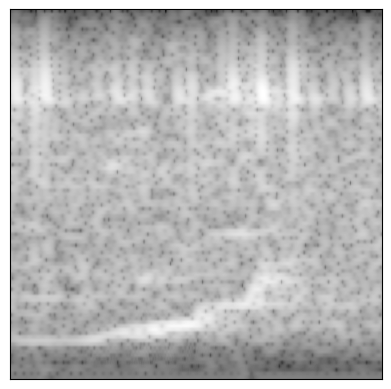

In [109]:
def draw_img_single(img_vector, h, w):
    """
    1. takes img_vector,
    2. reshapes into right dimensions,
    3. draws the resulting image
    """
    
    
    plt.imshow( (img_vector).reshape(h,w), cmap=plt.cm.gray)
    
    plt.xticks(())
    plt.yticks(())

draw_img_single(calls_spectogram_matrix[77], h=462, w=465) #79 on calls_log

# Vectorizing spectrograms in non calls folder

In [110]:
# Load dataset
non_calls_log = pd.read_csv('/Users/samuelguimte/Downloads/data/call_logs/1000_random_non_calls_log.csv')

In [111]:
# Example usage
csv_path = '/Users/samuelguimte/Downloads/data/call_logs/1000_random_non_calls_log.csv'
images_folder = '/Users/samuelguimte/Downloads/data/training_specs_without_calls'
spec_vecs_2 = images_to_numpy_list(csv_path, images_folder)

In [112]:
non_calls_log_mod1 = non_calls_log
non_calls_log_mod1['spectogram_matrix'] = spec_vecs_2
non_calls_log_mod2 = non_calls_log_mod1

non_calls_spectogram_matrix = reshape_spectrograms(non_calls_log_mod2, 'spectogram_matrix')

print("Shape of the data matrix:", non_calls_spectogram_matrix.shape)

Shape of the data matrix: (1000, 214830)


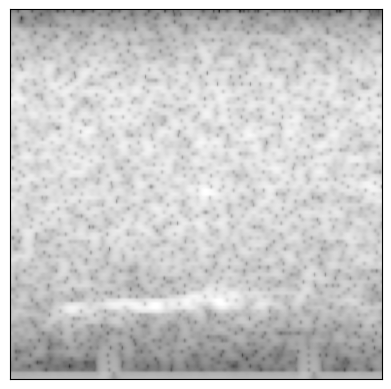

In [113]:
draw_img_single(non_calls_spectogram_matrix[77], h=462, w=465) #79 on non_calls_log